# Sheet 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import pyplot as plt
%matplotlib inline

## 1 Principal Component Analysis
### (a)

In [76]:
A = np.random.randint(0,10,(5,5))
A[:,[1,2,3]]

array([[6, 8, 8],
       [2, 0, 2],
       [7, 2, 3],
       [3, 9, 6],
       [0, 4, 0]])

In [4]:
# TODO: implement PCA (fill in the blanks in the function below)

def pca(data, n_components=None):
    """
    Principal Component Analysis on a p x N data matrix.
    
    Parameters
    ----------
    data : np.ndarray
        Data matrix of shape (p, N).
    n_components : int, optional
        Number of requested components. By default returns all components.
        
    Returns
    -------
    np.ndarray, np.ndarray
        the pca components (shape (n_components, p)) and the projection (shape (n_components, N))

    """
    # set n_components to p by default
    n_components = data.shape[0] if n_components is None else n_components
    assert n_components <= data.shape[0], f"Got n_components larger than dimensionality of data!"
    
    # center the data
    X  = data- np.mean(data,axis = 1,keepdims=True)  ##second term calculate p means and subtract each column vector of data with this (p x 1) matrix  

    # compute X times X transpose

    S = X@X.transpose()

    # compute the eigenvectors and eigenvalues
    eigenval,eigenvect  = np.linalg.eig(S)

    
    # sort the eigenvectors by eigenvalue and take the n_components largest ones
    arg_sort1 = np.flip(np.argsort(eigenval))  ##this will sort the eigenvalue array and will return the arguments from higher to lower value

    arg_sort = np.argsort(eigenval)[::-1]  ##this will sort the eigenvalue array and will return the arguments from higher to lower value
   
    ##calculating the component matrix 


    componenets = eigenvect[:,arg_sort[:n_components]]
    


    # compute X_projected, the projection of the data to the components
    X_projected  = componenets.T@X
    

    return componenets.T, X_projected  # return the n_components first components and the pca projection of the data


In [5]:
# Example data to test your implementation 
# All the asserts on the bottom should go through if your implementation is correct

data = np.array([
    [ 1,  0,  0, -1,  0,  0],
    [ 0,  3,  0,  0, -3,  0],
    [ 0,  0,  5,  0,  0, -5]
], dtype=np.float32)

# add a random offset to all samples. it should not affect the results
data += np.random.randn(data.shape[0], 1)

n_components = 2
components, projection = pca(data, n_components=n_components)  # apply your implementation

# the correct results are known (up to some signs)
true_components = np.array([[0, 0, 1], [0, 1, 0]], dtype=np.float32)
true_projection = np.array([
    [ 0,  0,  5,  0,  0, -5],
    [ 0,  3,  0,  0, -3,  0]
], dtype=np.float32)

# check that components match, up to sign
assert isinstance(components, np.ndarray), f'Expected components to be numpy array but got {type(components)}'
assert components.shape == true_components.shape, f'{components.shape}!={true_components.shape}'
assert np.allclose(np.abs(components * true_components).sum(1), np.ones(n_components)), f'Components not matching'

# check that projections agree, taking into account potentially flipped components
assert isinstance(projection, np.ndarray), f'Expected projection to be numpy array but got {type(projection)}'
assert projection.shape == (n_components, data.shape[1]), f'Incorrect shape of projection: Expected {(n_components, data.shape[1])}, got {projection.shape}'
assert np.allclose(projection, true_projection * (components * true_components).sum(1, keepdims=True), atol=1e-6), f'Projections not matching'

print('Test successful!')

Test successful!


### (b)

Load the data (it is a subset of the data at https://opendata.cern.ch/record/4910#)

In [6]:
features = np.load('data/dijet_features.npy')
labels = np.load('data/dijet_labels.npy')
label_names = ['b', 'c', 'q']  # bottom, charm or light quarks

print(f'{features.shape=}, {labels.shape=}')  # print the shapes

# TODO: print how many samples of each class are present in the data (hint: numpy.unique)

##lets try to find how classes are represented numerically -

class_vector =  np.unique(labels,return_counts  = True)  ##return counts return the frequency of each class
class_vector

features.shape=(116, 2233), labels.shape=(2233,)


(array([0., 1., 2.]), array([999, 864, 370], dtype=int64))

### We have three classes (Numerically represnted as 0,1,2) with followinig counts -
- Class 0 ('b') = 999
- Class 1 ('c') = 864 
- Class 2 ('q') = 370 


Normalize the data

In [7]:
# TODO: subtract the mean of each feature to center the data

## calculting mean of each fetures ie taking mean along the axis and subtracting it from the fetures using keepdims=True

features_centered = features- np.mean(features,axis = 1,keepdims=True)

##checking 
print("Mean-vectors of all fetaurs = ",np.mean(features_centered,axis = 1,dtype = int))


# TODO: divide by the standard deviation of each feature to normalize the variance

std_vector = np.std(features_centered,axis  = 1).reshape(features.shape[0],1)  ##calculating fetures std deviation and  converting it to a column vector

features_normalize = features_centered/std_vector

print("Mean-std of all fetaurs = ",np.std(features_normalize,axis = 1))


Mean-vectors of all fetaurs =  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
Mean-std of all fetaurs =  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### (c)
Compute a 2D PCA projection and make a scatterplot of the result, once without color, once coloring the dots by label

c:\Users\sgupt\anaconda3\envs\Pytorch\lib\site-packages\matplotlib\collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


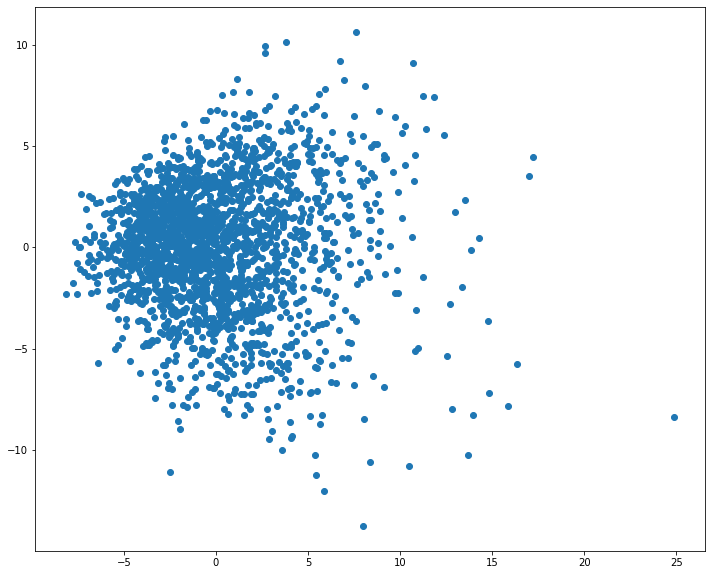

In [8]:
# TODO: apply PCA as implemented in (a)

W,projected_featurs = pca(features_normalize,2)    ###getting the projected features in 2D

# TODO: make a scatterplot of the PCA projection\
plt.figure(figsize= (12,10))  ##initializing figure in matplotlib
plt.scatter(projected_featurs[0,:],projected_featurs[1,:])
plt.show()

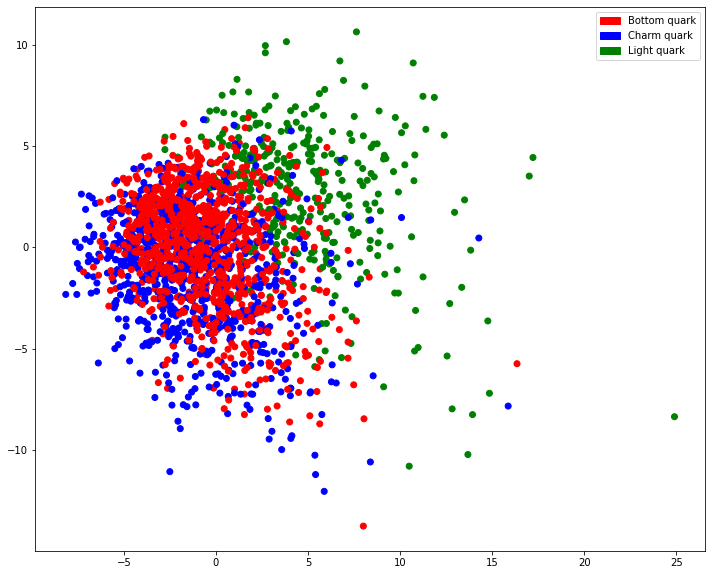

In [9]:
# TODO: make a scatterplot, coloring the dots by their label and including a legend with the label names


# (hint: one way is to call plt.scatter once for each of the three possible labels)\


c = ['r','b','g']   ##Three colors for three quarks , red for b quark, blue for c quark, green for light quark
color_arr = []   ## this array will store color value for each colors

plt.figure(figsize= (12,10))  ##initializing figure in matplotlib

for i in labels:
    color_arr.append(c[int(i)])   ##appending list

plt.scatter(projected_featurs[0,:],projected_featurs[1,:],c = color_arr)   ##plotting the data

###adding legends according to the colors
import matplotlib.patches as mpatches  
red_patch = mpatches.Patch(color='red', label='Bottom quark')
blue_patch = mpatches.Patch(color='blue', label='Charm quark')
green_patch = mpatches.Patch(color='green', label='Light quark')

plt.legend(handles=[red_patch,blue_patch,green_patch])
plt.show()


## 2 Nonlinear Dimension Reduction

In [10]:
import umap  # import umap-learn, see https://umap-learn.readthedocs.io/

In [11]:
# if you have not done 1(b) yet, you can load the normalized features directly:
features = np.load('data/dijet_features_normalized.npy')
labels = np.load('data/dijet_labels.npy')
label_names = ['b', 'c', 'q']  # bottom, charm or light quarks

### (a)

In [12]:
# TODO: Apply umap on the normalized jet features from excercise 1. It will take a couple of seconds.
# note: umap uses a different convention regarding the feature- and sample dimension, N x p instead of p x N!
reducer = umap.UMAP()

embedding = reducer.fit_transform(features_normalize.T)
embedding.shape

(2233, 2)

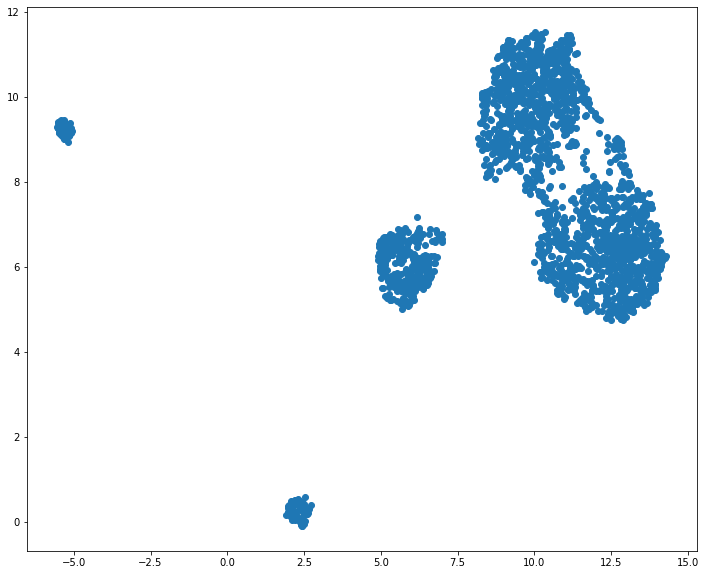

In [13]:
# TODO: make a scatterplot of the UMAP projection

plt.figure(figsize= (12,10))  ##initializing figure in matplotlib
plt.scatter(embedding[:,0],embedding[:,1])
plt.show()

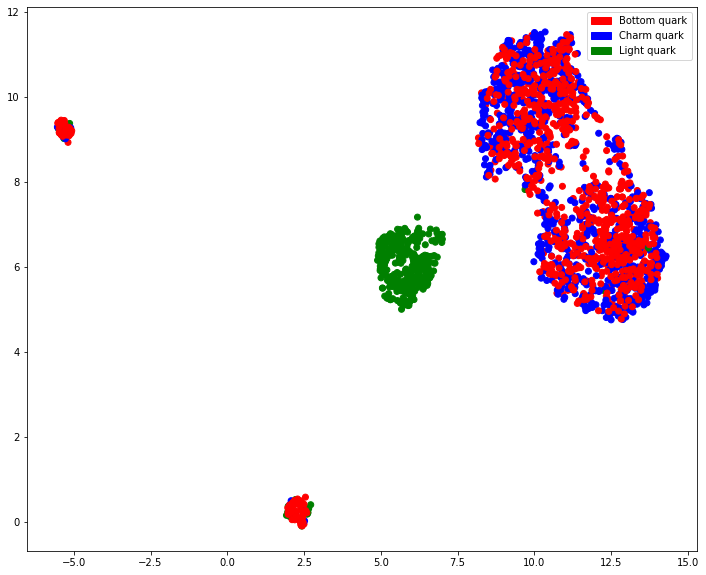

In [14]:



# TODO: make a scatterplot, coloring the dots by their label and including a legend with the label names
# (hint: one way is to call plt.scatter once for each of the three possible labels)

plt.figure(figsize= (12,10))  ##initializing figure in matplotlib

plt.scatter(embedding[:,0],embedding[:,1],c = color_arr)   ##plotting the data

###adding legends according to the colors
import matplotlib.patches as mpatches  
red_patch = mpatches.Patch(color='red', label='Bottom quark')
blue_patch = mpatches.Patch(color='blue', label='Charm quark')
green_patch = mpatches.Patch(color='green', label='Light quark')

plt.legend(handles=[red_patch,blue_patch,green_patch])
plt.show()


### (b)

c:\Users\sgupt\anaconda3\envs\Pytorch\lib\site-packages\umap\spectral.py:260: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


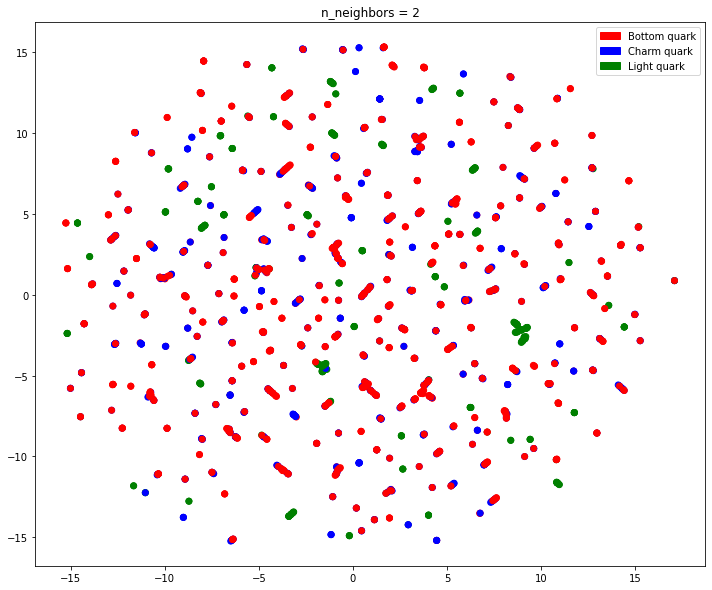

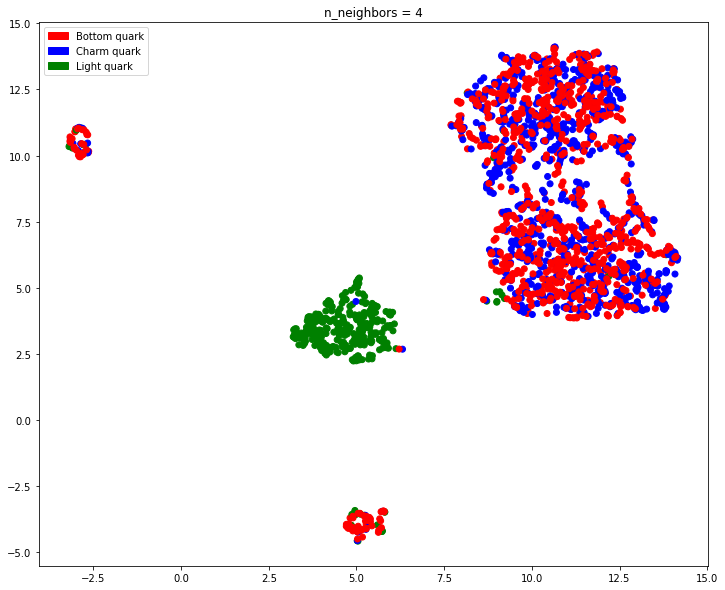

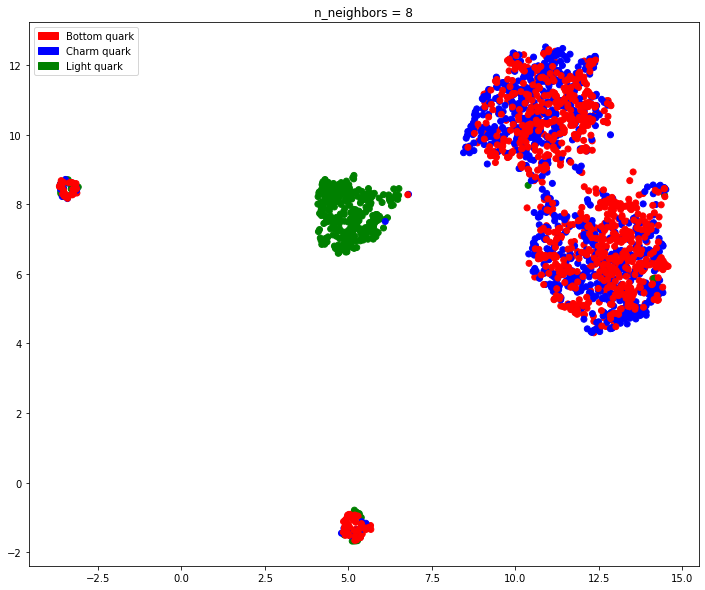

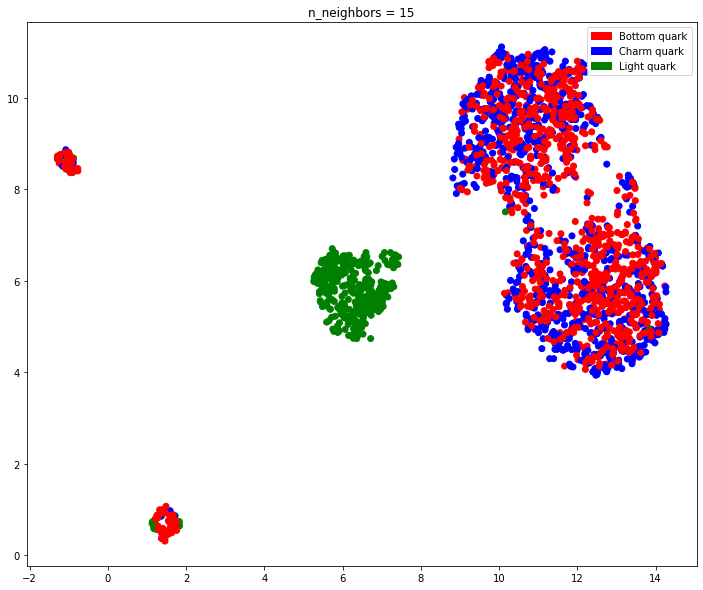

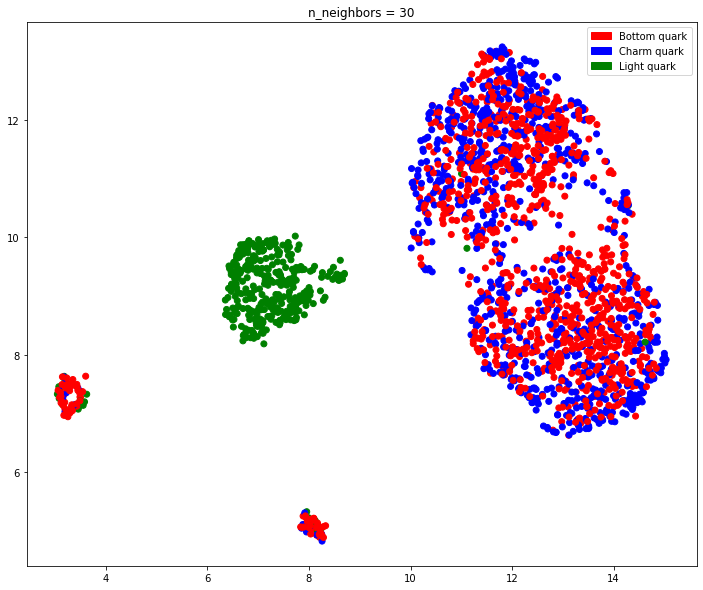

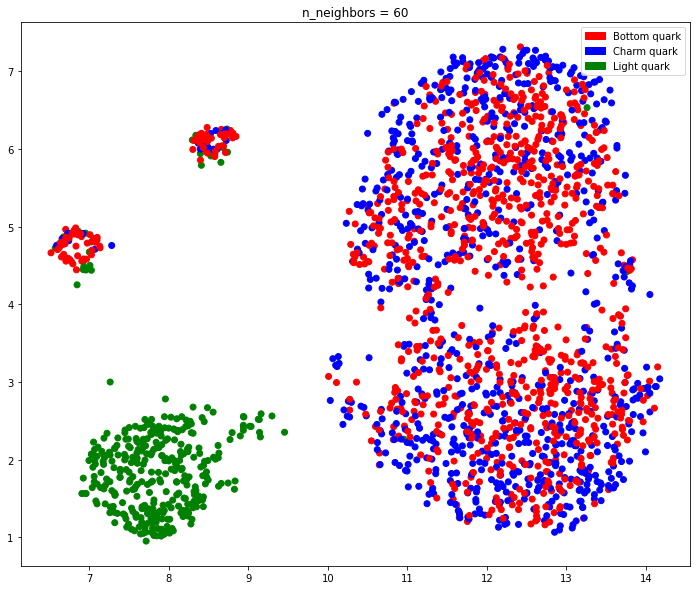

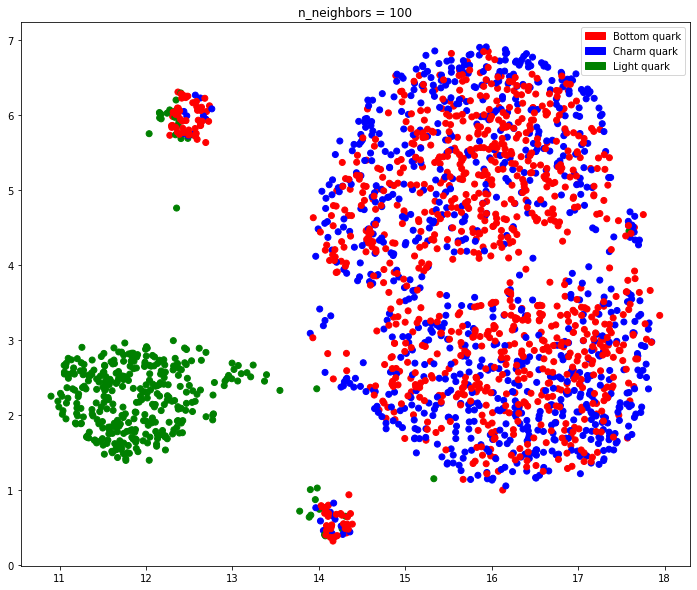

In [15]:
for n_neighbors in (2, 4, 8, 15, 30, 60, 100):
    # TODO: repeat the above, varying the n_neighbors parameter of UMAP
    reducer = umap.UMAP(n_neighbors=n_neighbors)
    
    embedding = reducer.fit_transform(features_normalize.T)
    plt.figure(figsize= (12,10))  ##initializing figure in matplotlib
    plt.title("n_neighbors = "+str(n_neighbors))
    plt.scatter(embedding[:,0],embedding[:,1],c = color_arr)   ##plotting the data

    ###adding legends according to the colors
    import matplotlib.patches as mpatches  
    red_patch = mpatches.Patch(color='red', label='Bottom quark')
    blue_patch = mpatches.Patch(color='blue', label='Charm quark')
    green_patch = mpatches.Patch(color='green', label='Light quark')

    plt.legend(handles=[red_patch,blue_patch,green_patch])
    plt.show()

### (c)

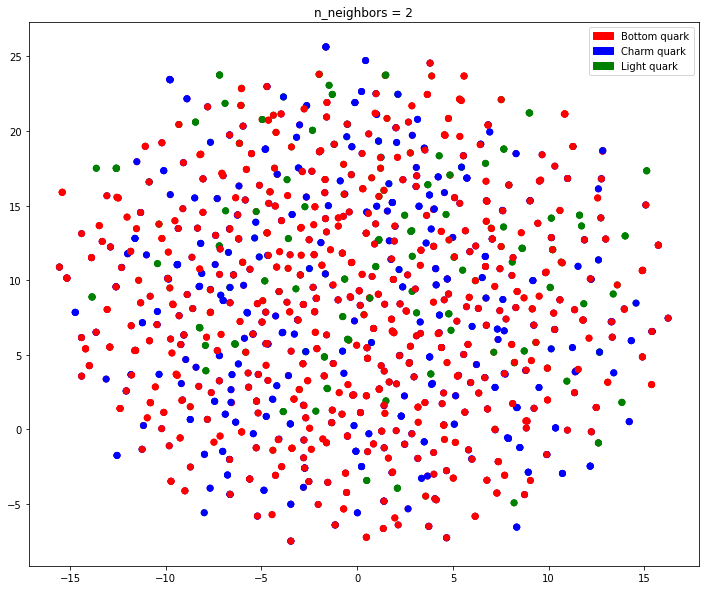

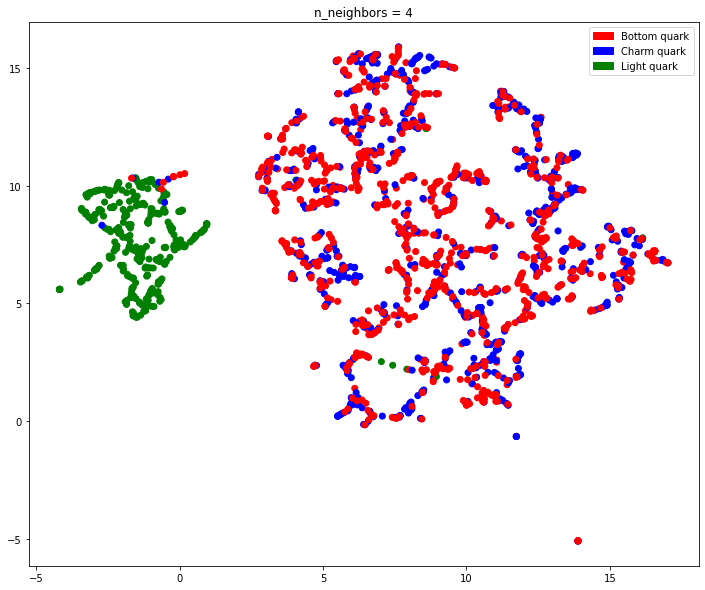

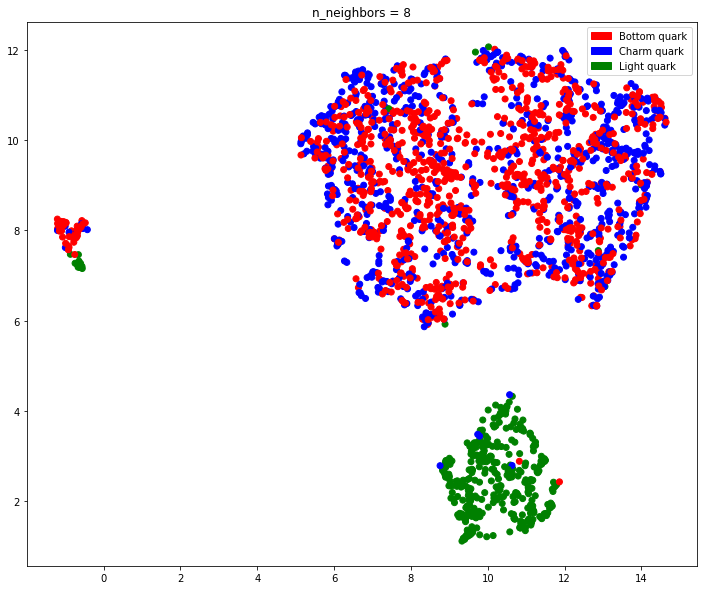

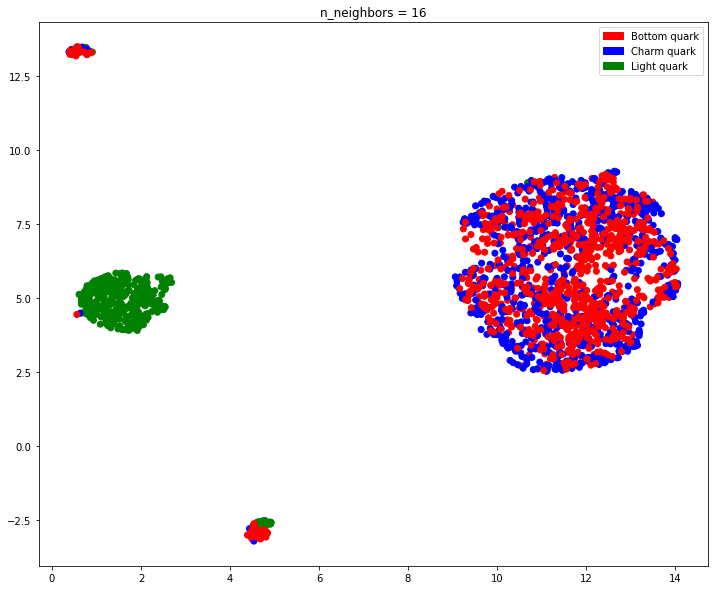

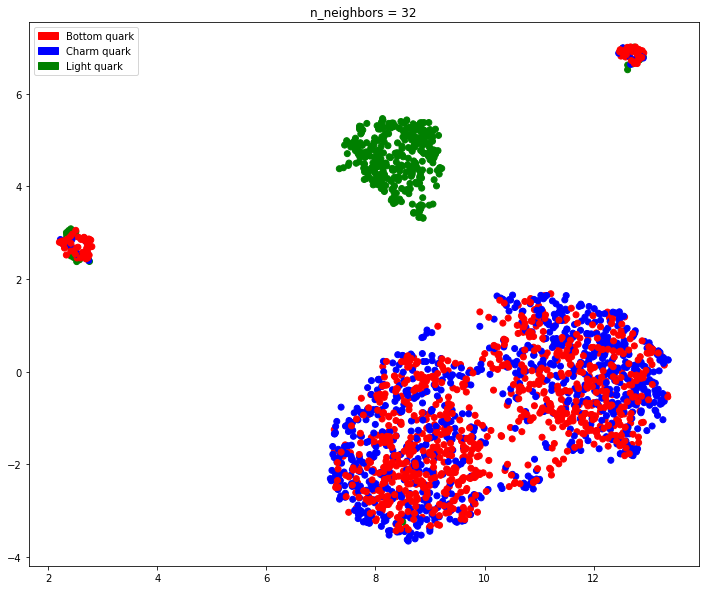

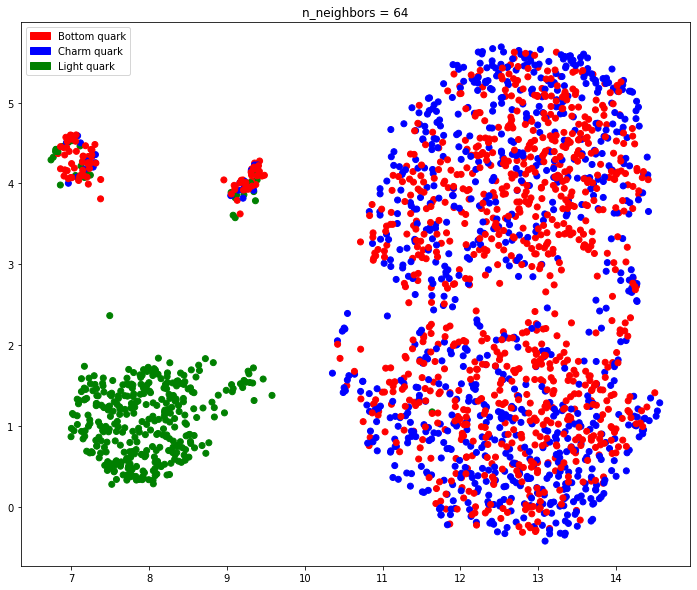

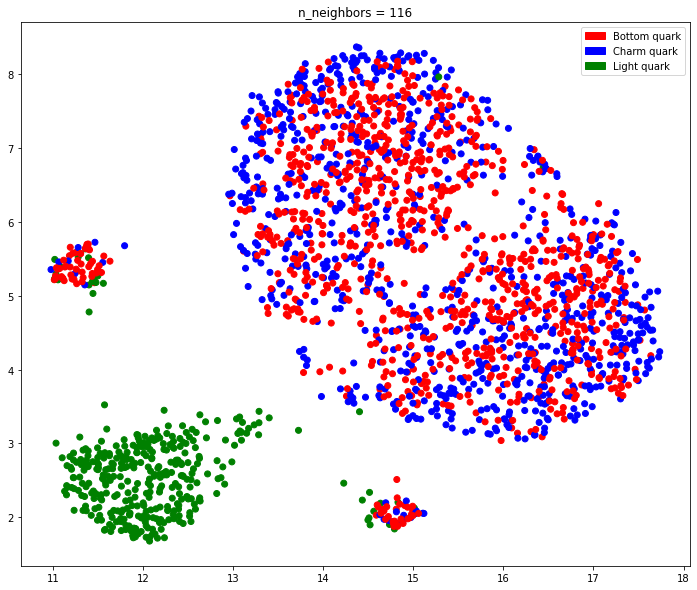

In [72]:
import umap
for n_components in (2, 4, 8, 16, 32, 64, len(features)):
    # TODO: project to the n-components first principal components 
    #       (use your implementation from ex. 1 or PCA from scikit-learn)


    W,projected_featurs = pca(features_normalize,n_components)

    projected_featurs = np.real(projected_featurs)
    
    # TODO: apply UMAP to get from n_components to just two dimensions
    reducer = umap.UMAP(n_neighbors=n_components)
    embedding = reducer.fit_transform(projected_featurs.T)
    plt.figure(figsize= (12,10))  ##initializing figure in matplotlib
    plt.title("n_neighbors = "+str(n_components))
    plt.scatter(embedding[:,0],embedding[:,1],c = color_arr)   ##plotting the data

    ###adding legends according to the colors
    import matplotlib.patches as mpatches  
    red_patch = mpatches.Patch(color='red', label='Bottom quark')
    blue_patch = mpatches.Patch(color='blue', label='Charm quark')
    green_patch = mpatches.Patch(color='green', label='Light quark')

    plt.legend(handles=[red_patch,blue_patch,green_patch])
    plt.show()

    # TODO: again, make scatterplots as before